# 最后的阶段性大作业

用所学知识对CDNow网站的用户购买明细数据进行分析

四个字段分别为：用户ID，购买日期，购买数量，购买金额。

参考思路：
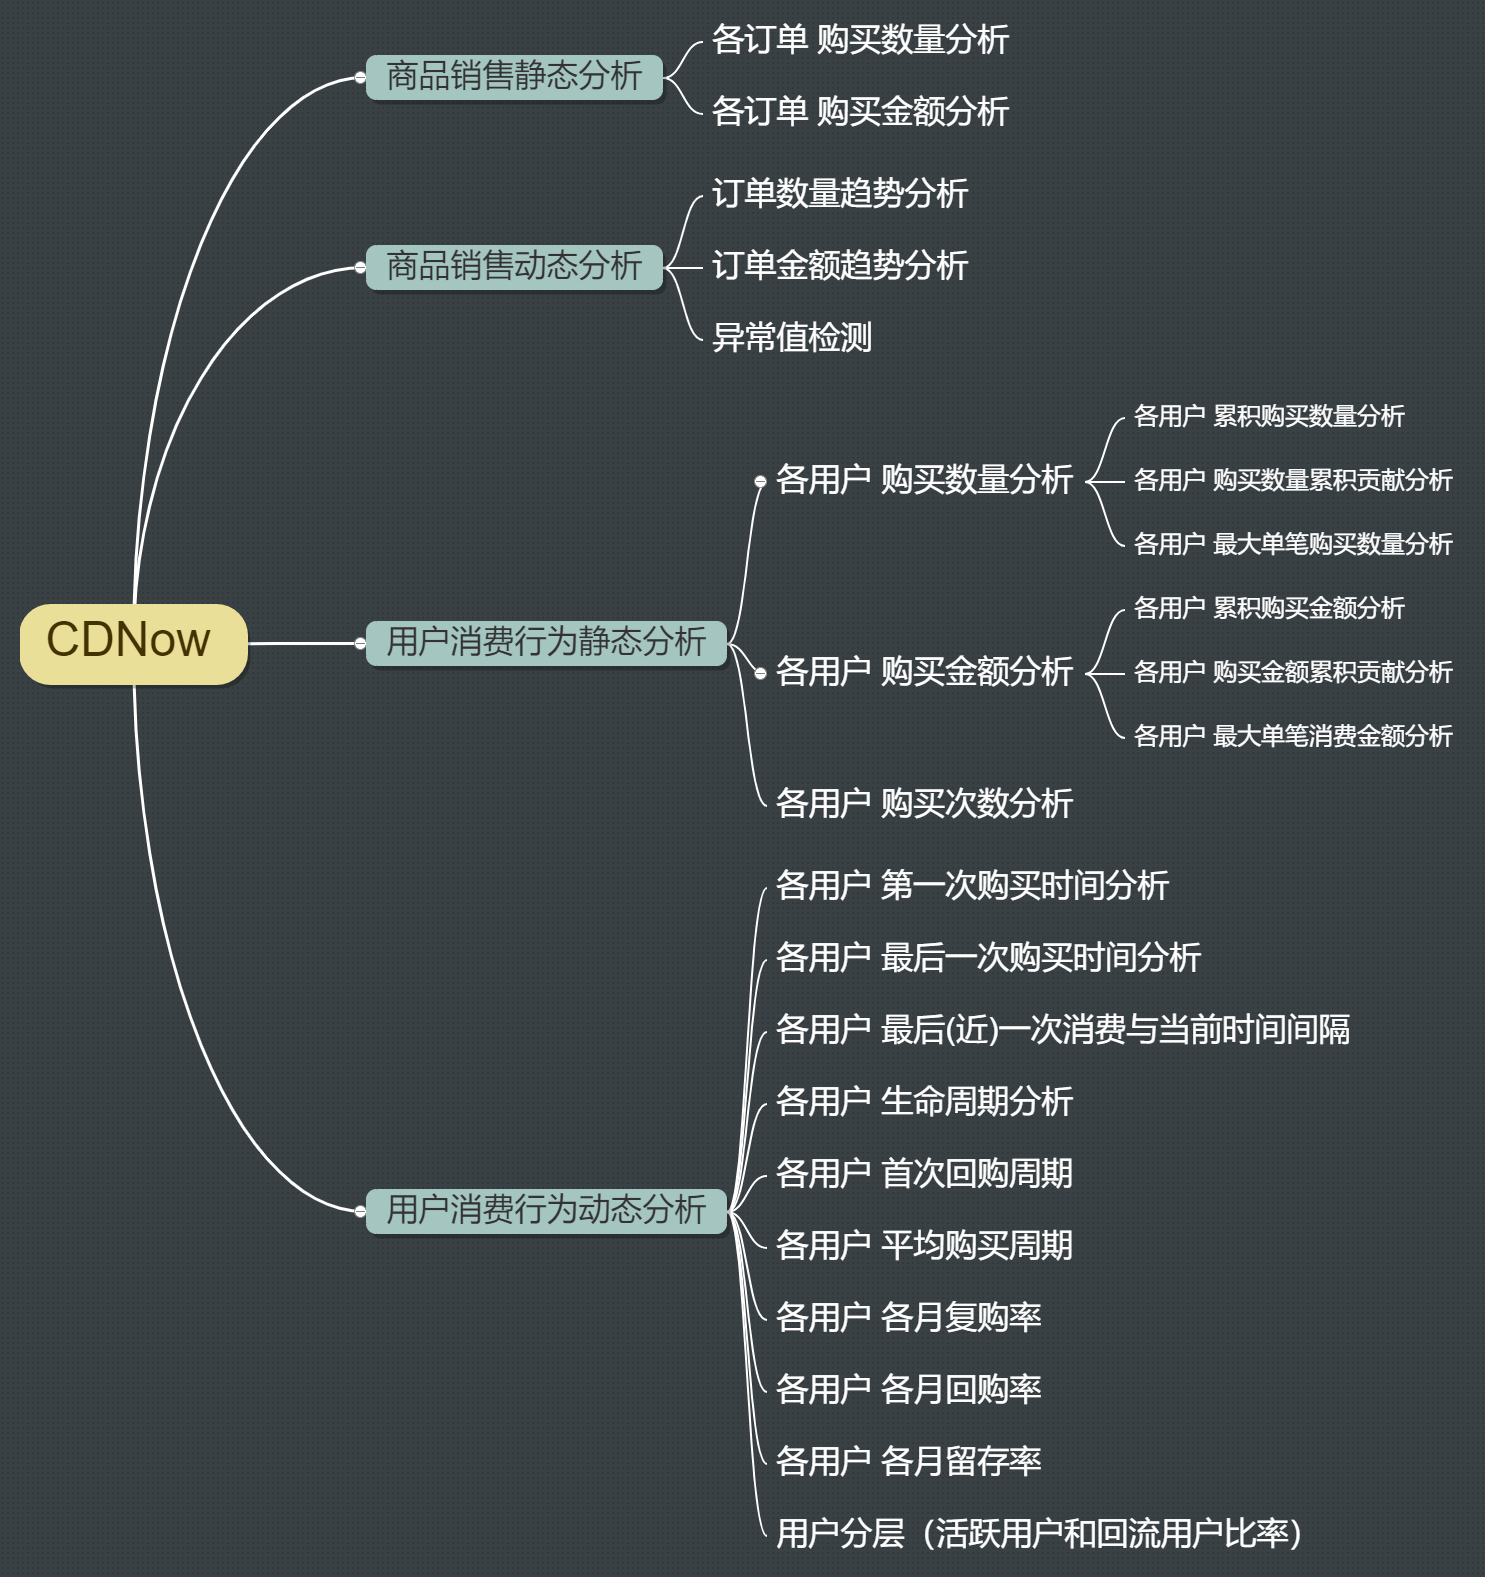

In [1]:
# 导入必要的包

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# 1.数据导入与初步处理
## 1.1 数据导入

In [2]:
# 用户ID，购买日期，购买数量，购买金额。

columns = ['user_id', 'order_dt', 'quantity', 'total']
data = pd.read_table('CDNOW.txt', names=columns, sep='\s+')

In [3]:
# 查看前5行

data.head()

,user_id,order_dt,quantity,total
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


观察前5行可以发现:user_id并不是唯一的，也就是:
- 同一个用户可以在同一天有多次购买行为
- 同一个用户也可以在不同的日期有购买行为

In [4]:
# 查看data整体情况

data.info()

# 共有69659条购买记录
# 数据很完整，不存在空值，有3个列为int64类型，1个列为float64类型
# 数据集大小大概是 2.1MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id     69659 non-null int64
order_dt    69659 non-null int64
quantity    69659 non-null int64
total       69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


## 1.2 初步处理

主要是处理order_date列，将其转换为datetime类型，并提取月份信息

In [5]:
data['order_date'] = pd.to_datetime(data.order_dt, format="%Y%m%d")

data['month'] = data['order_date'].astype('datetime64[M]')

# data = data.reindex(columns=['user_id', 'order_date', 'month', 'quantity', 'total'])

In [6]:
data.head()

,user_id,order_dt,quantity,total,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


# 2.商品销售分析
## 2.1 商品销售静态分析

In [7]:
# 各订单 购买数量&购买金额 分析

data.describe()

,user_id,order_dt,quantity,total
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


购买数量(quantity):
- 平均每条记录的购买数量为2.4个商品，标准差为2.33
- 中位数为2个商品，75分位数为3个商品,说明大多数记录的购买量都不多
- 单条记录最大的购买数量为99个商品，最小为1个商品

购买金额(total):
- 平均每条记录的平均金额为35.8美元，标准差为36.28
- 中位数为25.98美元，75分位数为43.7美元，也可以看出大多数记录的购买金额也不多
- 单条记录最大的购买金额为1286美元，最小的为0，猜测应该是赠品

一般而言，消费数据都会呈现二八定律，即20%的客户贡献了80%的订单量或销量。下文会对齐进行验证。

## 2.2 商品销售动态分析

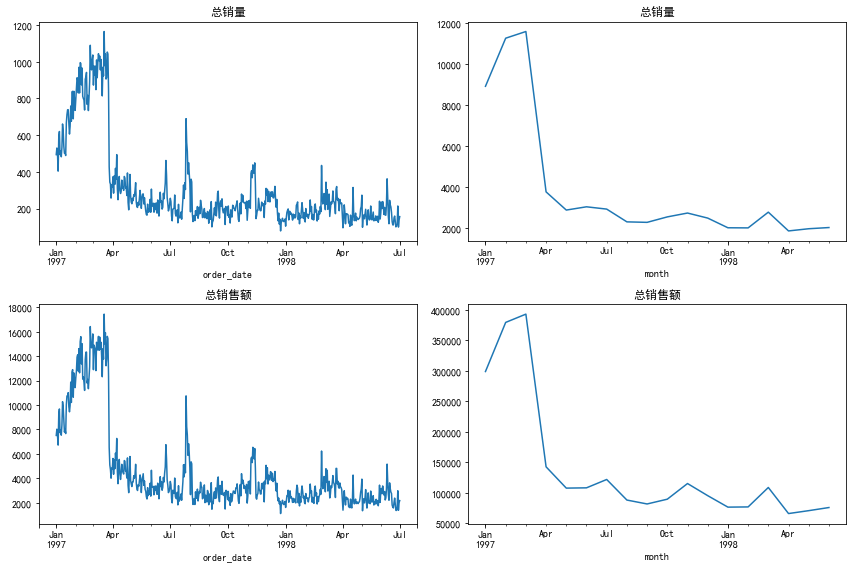

In [8]:
# 订单购买数量&订单购买金额 趋势分析

#解决中文显示参数设置
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
# 设置图的大小，添加子图
plt.figure(figsize=(12,8))

# 每天的购买数量
plt.subplot(221)
data.groupby('order_date')['quantity'].sum().plot() 
plt.title('总销量') 
 
#每月的购买数量
plt.subplot(222)
data.groupby('month')['quantity'].count().plot()
plt.title('总销量') 

#每天的购买金额
plt.subplot(223)
data.groupby('order_date')['total'].sum().plot()
plt.title('总销售额')

#每月的购买金额
plt.subplot(224)
data.groupby('month')['total'].sum().plot()
plt.title('总销售额')
plt.tight_layout() # 设置子图的间距
plt.show()

可以发现早期的销量很高，在97年3月左右到5月出现“骤降”，后面也是波浪式的下降，购买金额也有相同的趋势。为什么会出现这种情况？可以思考一下

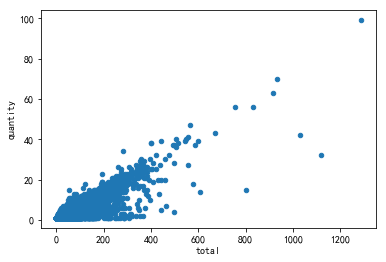

In [9]:
# 异常值检测

data.plot.scatter(x='total', y='quantity')

未发现明显的异常点

# 3.用户消费行为静态分析
## 3.1 各用户 购买数量&购买金额 分析

In [10]:
# 各用户 累计购买数量&购买金额分析

data.groupby('user_id').sum().describe()

,order_dt,quantity,total
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


可以看出:
- 购买数量(quantity):每个用户平均购买了7张CD，最多的共购买了1033张CD,最少的仅购买了1张。
- 购买金额(total):用户平均消费106美元，但是中位数只有43美元，因此可以推测存在少部分的高额消费用户

In [11]:
# 各用户 购买数量&购买金额 累计贡献分析

(data.groupby('user_id')['quantity'].sum()/data['quantity'].sum()).describe()

count    23570.000000
mean         0.000042
std          0.000101
min          0.000006
25%          0.000006
50%          0.000018
75%          0.000042
max          0.006153
Name: quantity, dtype: float64

In [12]:
(data.groupby('user_id')['total'].sum()/data['total'].sum()).describe()

count    23570.000000
mean         0.000042
std          0.000096
min          0.000000
25%          0.000008
50%          0.000017
75%          0.000043
max          0.005596
Name: total, dtype: float64

可以发现，购买数量最大的累计贡献为0.006153，中位数为0.000018，最小值仅为0.000006，购买金额也有类似的结果，这也进一步印证了我们上面的推测：
存在少部分的高额消费用户

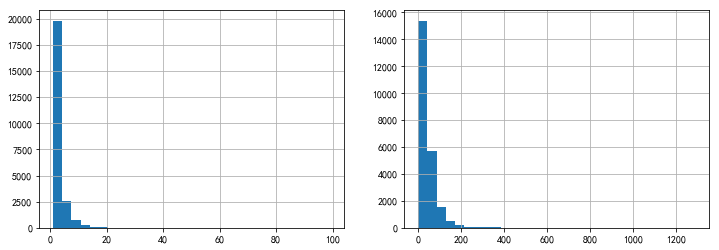

In [13]:
# 各用户最大单笔 购买数量&消费金额 分析
plt.figure(figsize=(12,4))
plt.subplot(121)
data.groupby('user_id')['quantity'].max().hist(bins=30)
plt.subplot(122)
data.groupby('user_id')['total'].max().hist(bins=30)

可以发现，大部分用户的消费能力一般，单次购买数量超过10张的人数很少，单次购买金额超过100美元的也非常少，高消费用户在图中几乎看不到，这也符合消费行业的一般规律。

## 3.2 各用户购买次数分析

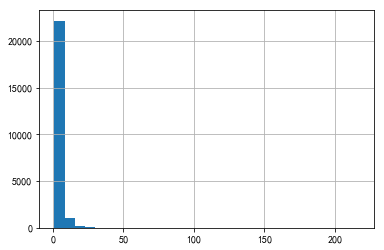

In [14]:
data['user_id'].value_counts().hist(bins=30)

大部分用户的购买次数在6次左右，超过10次的用户几乎看不到

# 4.用户消费行为动态分析
## 4.1 各用户 第一次&最后一次 购买时间分析

In [15]:
data.groupby('user_id')['month'].min().value_counts()/data['user_id'].nunique()

1997-02-01    0.359610
1997-01-01    0.332881
1997-03-01    0.307510
Name: month, dtype: float64

In [16]:
data.groupby('user_id')['month'].max().value_counts()/data['user_id'].nunique()

1997-02-01    0.208401
1997-03-01    0.189987
1997-01-01    0.177853
1998-06-01    0.063895
1998-05-01    0.044209
1998-03-01    0.042130
1998-04-01    0.032626
1997-04-01    0.028723
1997-12-01    0.026305
1997-11-01    0.025838
1998-02-01    0.023335
1998-01-01    0.021807
1997-06-01    0.021171
1997-07-01    0.020916
1997-05-01    0.020365
1997-10-01    0.019304
1997-09-01    0.016843
1997-08-01    0.016292
Name: month, dtype: float64

用户初次消费月份主要集中在97年的前三个月，最后消费月份同样集中在97年的前三个月，后边也有用户消费，但是数量逐渐减少

## 4.2 各用户最后(近)一次消费与当前时间间隔

In [17]:
date_diff = datetime.now() - data.groupby('user_id')['order_date'].max()

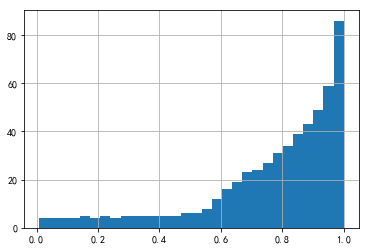

In [24]:
((date_diff.value_counts().cumsum()/data['user_id'].nunique())).hist(bins=30)

## 4.3 用户生命周期分析

第一次消费至最后一次消费时间之差为用户的生命周期

In [19]:
order_date_min = data.groupby("user_id")['order_date'].min()
order_date_max = data.groupby("user_id")['order_date'].max()

(order_date_max-order_date_min).head()

user_id
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: order_date, dtype: timedelta64[ns]

In [20]:
(order_date_max-order_date_min).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_date, dtype: object

用户生命周期平均为134天，最长的生命周期是544天。

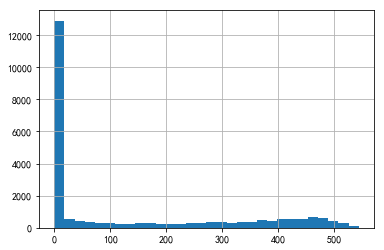

In [21]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist(bins=30)

可以发现大部分用户只消费了一次，用户生命周期都集中在了0天，这并不是我们想要的。因此将只消费一次的用户删掉，来计算消费两次以上顾客的生命周期。

In [25]:
life_cycle = (order_date_max-order_date_min).reset_index()
life_cycle.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


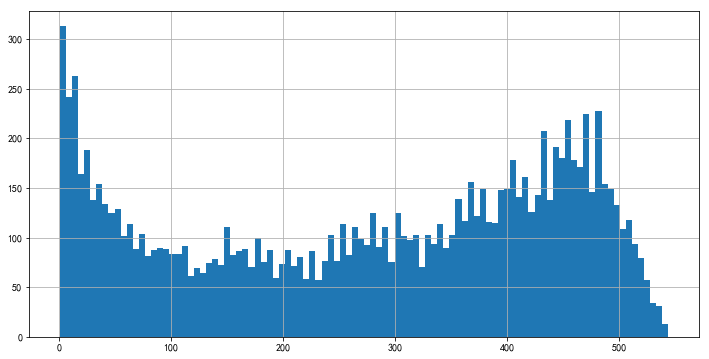

In [27]:
life_cycle['life_time'] = life_cycle['order_date']/np.timedelta64(1,'D')
life_cycle[life_cycle['life_time']>0]['life_time'].hist(bins=100, figsize=(12,6))

虽然仍有不少用户生命周期集中在0天，但是比第一张图好很多了，呈现双峰趋势图。
- 部分质量差的用户虽然消费了两次，但仍旧无法持续，在用户首次消费30天应该尽量引导
- 少部分用户集中在50天~300天，属于普通型的生命周期
- 高质量与用户的生命周期，集中在400天以后，这已经属于忠诚用户了

In [28]:
life_cycle[life_cycle['life_time']>0]['life_time'].describe()

count    11516.000000
mean       276.044807
std        166.633990
min          1.000000
25%        117.000000
50%        302.000000
75%        429.000000
max        544.000000
Name: life_time, dtype: float64

消费两次及以上用户的平均生命周期是276天，远高于总体的134天。

## 4.4 复购率&回购率

- 复购率：指在某时间窗口内消费两次及以上用户所占的比例
- 回购率：指在某一时间窗口内消费，在下一时间窗口仍然消费的顾客占比

这里时间窗口我们选择一个月

In [29]:
# 复购率

#统计消费用户消费次数
pivoted_counts=data.pivot_table(index='user_id',columns='month',values='order_date',aggfunc='count').fillna(0)
columns_month=data.month.sort_values().astype('str').unique()
pivoted_counts.columns=columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# 消费两次及以上记为1，消费一次记0，没有消费记为NaN

pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


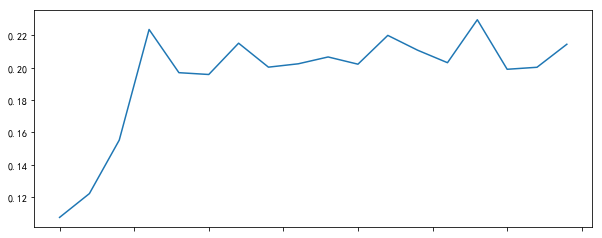

In [33]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize = (10,4))

由上图可以看出，在早期，由于新用户的大量加入，早期新客的复购率并不高，但随着时间的推移，出现比较多忠诚的老顾客，复购率上升，维持在20%左右。

In [34]:
# 回购率

pivoted_amount = data.pivot_table(index = 'user_id', columns = 'month',
                               values = 'total', aggfunc = 'mean').fillna(0)
columns_month = data.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [35]:
# 某月内有消费记录记为1，没有则为0.

pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x> 0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [36]:
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status
from pandas import DataFrame
pivoted_purchase_return = pivoted_purchase.apply(purchase_return, axis = 1)
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns
columns_month = data.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_return1 = pd.DataFrame(list(pivoted_purchase_return),columns = columns_month, index = user_id)
#Series转化为Dataframe的方法：先转化为list类型，再转化为DataFrame，期间可传入columns
pivoted_purchase_return1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


上面函数if的主要逻辑为，如果用户本月有消费，且下月有消费，记为1，下月无消费，记为0；如果用户本月没有消费，记为NaN。

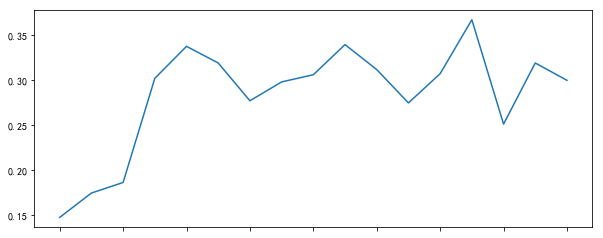

In [37]:
pivoted_purchase_return1.mean().plot(figsize = (10,4))

可知，用户的回购率约为30%，大于复购率20%。
综合回购率和复购率可知，新客质量整体低于老客，老客忠诚度表现较好，这是CDNow网站的用户消费特征。

## 4.5 留存率

留存率是消费领域的经典应用。指用户第一次消费后，有多少比率进行第二次消费。和回流率区别是留存率倾向于计算第一次消费，并有多个时间窗口。

In [40]:
user_purchase_retention = pd.merge(left = data, right = order_date_min.reset_index(),
                                   how = 'inner', on = 'user_id',
                                   suffixes = ('', '_min')
                                  )
user_purchase_retention.head()

,user_id,order_dt,quantity,total,order_date,month,order_date_min
0,1,19970101,1,11.77,1997-01-01,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01,1997-01-12
2,2,19970112,5,77.00,1997-01-12,1997-01-01,1997-01-12
3,3,19970102,2,20.76,1997-01-02,1997-01-01,1997-01-02
4,3,19970330,2,20.76,1997-03-30,1997-03-01,1997-01-02


In [41]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date-user_purchase_retention.order_date_min
#将日期转化为时间
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D')) #日期转换为时间
user_purchase_retention.head()

,user_id,order_dt,quantity,total,order_date,month,order_date_min,order_date_diff,date_diff
0,1,19970101,1,11.77,1997-01-01,1997-01-01,1997-01-01,0 days,0.0
1,2,19970112,1,12.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0
2,2,19970112,5,77.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0
3,3,19970102,2,20.76,1997-01-02,1997-01-01,1997-01-02,0 days,0.0
4,3,19970330,2,20.76,1997-03-30,1997-03-01,1997-01-02,87 days,87.0


In [42]:
bin = [0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)
user_purchase_retention.head(10)

,user_id,order_dt,quantity,total,order_date,month,order_date_min,order_date_diff,date_diff,date_diff_bin
0,1,19970101,1,11.77,1997-01-01,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,19970112,1,12.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0,NaN
2,2,19970112,5,77.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0,NaN
3,3,19970102,2,20.76,1997-01-02,1997-01-01,1997-01-02,0 days,0.0,NaN
4,3,19970330,2,20.76,1997-03-30,1997-03-01,1997-01-02,87 days,87.0,"(60, 90]"
5,3,19970402,2,19.54,1997-04-02,1997-04-01,1997-01-02,90 days,90.0,"(60, 90]"
6,3,19971115,5,57.45,1997-11-15,1997-11-01,1997-01-02,317 days,317.0,"(180, 365]"
7,3,19971125,4,20.96,1997-11-25,1997-11-01,1997-01-02,327 days,327.0,"(180, 365]"
8,3,19980528,1,16.99,1998-05-28,1998-05-01,1997-01-02,511 days,511.0,NaN
9,4,19970101,2,29.33,1997-01-01,1997-01-01,1997-01-01,0 days,0.0,NaN


利用cut函数将数据进行分箱。这里date_diff=0并没有被划分入0～3天，因为计算的是留存率，如果用户仅消费了一次，留存率应该是0。另外用户一天内多次消费，但以后没有消费，也算作留存率0.

In [43]:
pivoted_retention = user_purchase_retention.pivot_table(index = 'user_id', columns = 'date_diff_bin',
                                                       values = 'total', aggfunc = sum, dropna = False)
pivoted_retention.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.9,NaN,110.4,155.54


In [44]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

计算了第一次消费过后，后续个时间段的消费平均值，虽然后面的时间段消费金额更高，但是其时间段更广，因此第一次消费后的0-3天内有可能消费更高。
但仍然要看具体的数字，看有多少用户比例在初次购买后0-3天内再次消费：

In [45]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,1,1


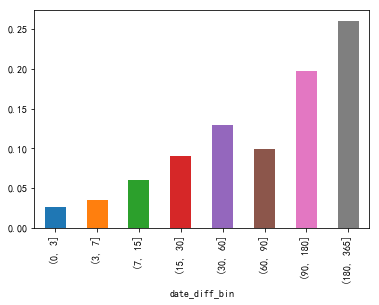

In [46]:
pivoted_retention_trans.mean().plot.bar()

可见0-3天内再次消费的比例只有只有2.5%，3-7天之内的消费比例只有3%。说明CD购买并不是高频消费行为。时间范围放宽之后，数字好看了不少，有20%的用户在3个月到半年内再次购买，25%的用户在半年到一年内再次购买。因此，从运营角度讲，既要培养新用户，又要注重培养用户忠诚度，放长线钓大鱼。

## 4.6 用户分层

按照用户的消费行为，将其分为4个维度：新用户、活跃用户、不活跃用户、回流用户。

新用户指第一次消费。活跃用户即老客，指在某一个时间窗口内有过消费。不活跃用户指在某一个时间窗口内没有消费过的老客。回流用户指在上一个窗口内没有消费，在当前窗口内有消费。以上窗口按月计。

例如，某一个用户，在1月份首次消费即是新用户；他在2月份又消费，则是活跃用户；3月份不消费，属于不活跃用户；4月份消费，此时是回流用户，5月份又消费，属于活跃用户。

用户分层涉及到比较复杂的逻辑判断。

In [47]:
def active_ststus(data):
    status = []
    for i in range(18):
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月有消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status
pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_ststus(x), axis = 1)
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns
columns_month = data.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_status1 = pd.DataFrame(list(pivoted_purchase_status),columns = columns_month, index = user_id)
pivoted_purchase_status1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


用户每个月的分层状态以及变化已经被计算出来。

In [48]:
purchase_status1_counts = pivoted_purchase_status1.replace('unreg', np.NaN).apply(pd.value_counts) #此时apply是在列上执行运算
#把unreg状态排除掉，他是未来作为新客，只是一个暂时状态。然后计算不同分层每月的统计量
purchase_status1_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


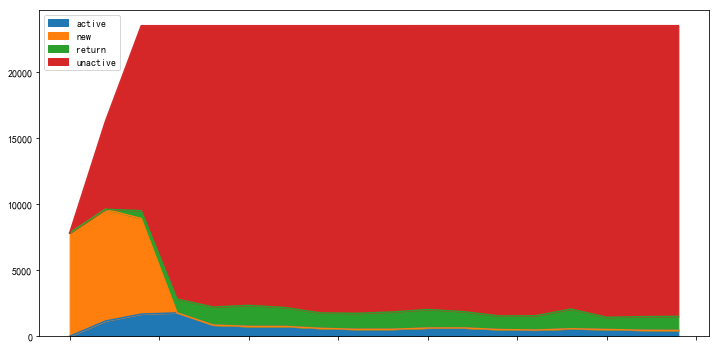

In [49]:
purchase_status1_counts.fillna(0).T.plot.area(figsize = (12,6))

只看蓝色和绿色活跃用户和回流用户两个分层，他们的和就是消费用户占比。3月份之后，总量不再变化，说明后期没有新客。

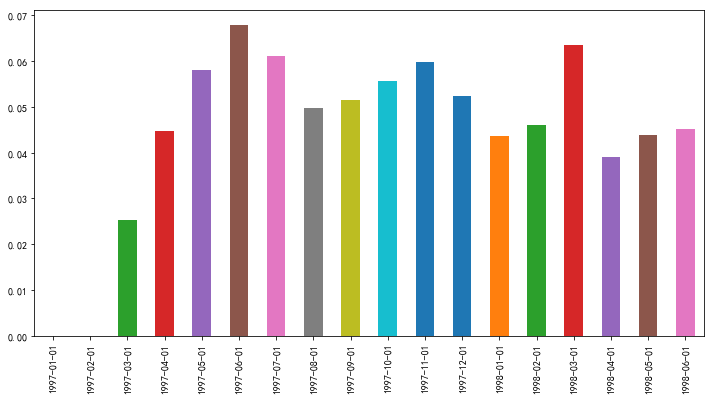

In [50]:
return_rate = purchase_status1_counts.apply(lambda x: x/x.sum())
return_rate.loc['return'].plot.bar(figsize = (12,6)) #每个月回流用户的占比

回流用户占比为5%-8%之间，有下降趋势，回流用户占比，指在总用户中的占比。

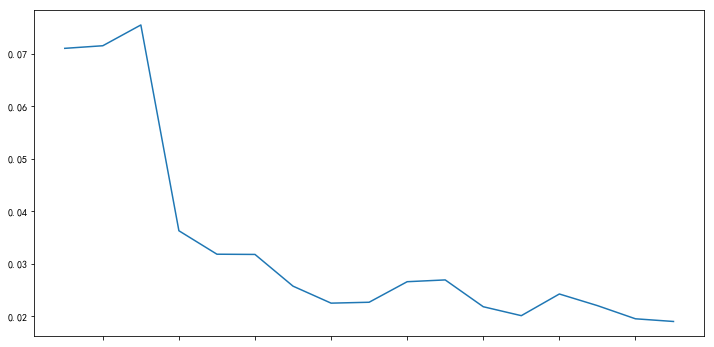

In [51]:
return_rate.loc['active'].plot(figsize = (12,6)) #每月活跃用户的占比

活跃用户下降趋势更明显，后期占比为2%左右。活跃用户为连续消费用户，质量在一定程度上高于回流用户。

结合回流用户和活跃用户，后期消费中60%是回流用户，40%是活跃用户，整体质量尚可，对于这两个分层依旧有改进空间，可以继续细化数据。

# 6.简单结论

- 1.整体趋势：按年的月份趋势销量和销售额在1-3月份相对极高，然后骤降，原因可能跟这段时间的大力促销或与商品的季度属性有关。
- 2.用户个体特征：每笔订单的金额和商品购买量都集中在区间的低段水平，都是小金额小批量进行购买，此类交易群体，可在丰富产品线和增加促销活动提高转换率和购买率。
- 3.大部分用户的消费总额和购买总量都集中刚在低段，长尾分布，这个跟用户需求有关，可以对商品进行多元文化价值的赋予，增强其社交价值属性，提高用户的价值需求。
- 4.用户的生命周期：有二次及以上消费的用户的平均生命周期是276天。用户的生命周期分别在20天内与400至500天间，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。
- 5.用户质量：用户个体消费有一定规律性，大部分用户的消费集中在2000以下，用户消费反应了2/8法则，消费排名前20%的用户贡献了80%的消费额。所以说，狠抓高质量用户是万古不变的道理，这些高质量客户都是“会员”类型，需要专门为会员优化购物体验，比如专线接听、特殊优惠等等。
- 6.留存率来看，一半的用户会流失，所以应该注重对用户的忠诚度的培养，比如打卡签到，积分制度，老用户打折制度会员升级制度。